## Data Cleansing Motorbike Marketplace


Kelompok 2 

1. Daniel Adless Erich
2. Fitri Nur Utami
3. Galih Aulia Murdyahanjani
4. Dyah Najunda Salsabila
5. Widya Arum Indra Yusita

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

- Here the dataset used is motorbikes.csv data

##### About motorcycle information on one of Europe's largest motor vehicle sales platforms

In [2]:
df = pd.read_csv('europe-motorbikes-zenrows.csv')

- Show dataset that has been loadedHere we want to display the top 10 data contents of a file europe motor bikes zenrows.

In this data there are 10 columns, namely :
- column price: discusses the price of the motorcycle on sale
- column Mileage: discusses the kilometers (KM) found on a motorcycle
- column power: discusses the power of the motorcycle engine
- column make model : discusses the brand and model of the motorcycle
- column date : the date of the sale
- column fuel: discusses the fuel used by the motorcycle.
- column gear : the number of gears contained in the motorcycle.
- column offer type : offer (new motorcycle or second motorcycle)
- column version : the version of the motorcycle.
- column link : link of the information

In [3]:
df.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


- Display data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


Here we want to see whether there are missing values or not and the suitability of the type of data used.
We can see here that the data with missing values is :

- power
- fuel
- gear
- version

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%m/%Y', errors='coerce')

In [6]:
print(df['date'].dtype)

datetime64[ns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   price       34917 non-null  int64         
 1   mileage     34917 non-null  int64         
 2   power       28598 non-null  float64       
 3   make_model  34917 non-null  object        
 4   date        34889 non-null  datetime64[ns]
 5   fuel        31727 non-null  object        
 6   gear        12847 non-null  object        
 7   offer_type  34917 non-null  object        
 8   version     17413 non-null  object        
 9   link        34917 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [8]:
df.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,2020-03-01,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,2018-09-01,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,2019-10-01,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,2016-03-01,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,2009-08-01,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


## Column power

- Show the column visualization

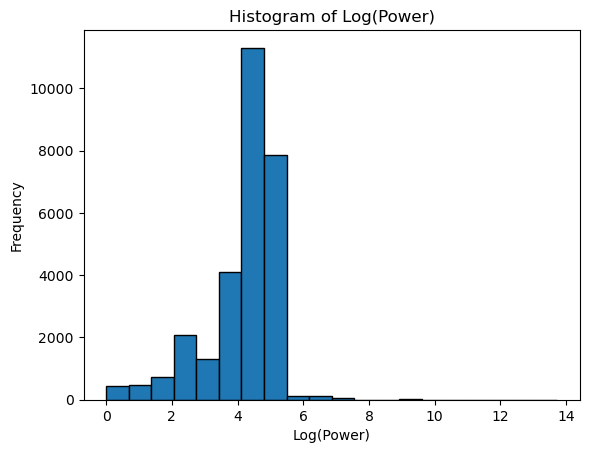

In [9]:
log_power = np.log(df['power'])
plt.hist(log_power, bins=20, edgecolor='k')
plt.title('Histogram of Log(Power)')
plt.xlabel('Log(Power)')
plt.ylabel('Frequency')
plt.show()

Because column power is skewness distributed

then we will do imputation on column power using median

after that we overcome the missing value in the power column by using the median.
by finding the average of the power contained in the motor, the missing value will be covered.

In [10]:
val = df.power.median()
df['power'] = df.power.fillna(val)

Display the dataset info to see if the column power has been imputed.

It turns out that the column power has now changed its amount

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   price       34917 non-null  int64         
 1   mileage     34917 non-null  int64         
 2   power       34917 non-null  float64       
 3   make_model  34917 non-null  object        
 4   date        34889 non-null  datetime64[ns]
 5   fuel        31727 non-null  object        
 6   gear        12847 non-null  object        
 7   offer_type  34917 non-null  object        
 8   version     17413 non-null  object        
 9   link        34917 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.7+ MB


## Column fuel

The total number of data entries is 34917, while the fuel column has 31727.

This means there is null data in the fuel column. 

Let's check where the null data is?

In [12]:
df.fuel[df.fuel.isnull()]

18       NaN
21       NaN
23       NaN
24       NaN
26       NaN
        ... 
34883    NaN
34888    NaN
34889    NaN
34905    NaN
34914    NaN
Name: fuel, Length: 3190, dtype: object

Display the proportion of column fuel data.

It turns out that the column fuel data is categorical data

In [13]:
df.fuel.value_counts()

Gasoline               30494
Two Stroke Gasoline      497
Electric                 411
Others                   171
Diesel                   144
Electric/Gasoline          8
LPG                        2
Name: fuel, dtype: int64

If we want to do imputation on column fuel

then we check the column fuel data type first.

The column fuel data is categorical data so the imputation uses the mode.

From the column fuel proportion, Gasoline is the most frequent data so Gasoline is the mode.

In [14]:
val = df.fuel.mode().values[0]
df['fuel'] = df.fuel.fillna(val)

After imputation, it can be seen that the proportion has changed.

In [15]:
df.fuel.value_counts()

Gasoline               33684
Two Stroke Gasoline      497
Electric                 411
Others                   171
Diesel                   144
Electric/Gasoline          8
LPG                        2
Name: fuel, dtype: int64

- Show the latest information from column gear

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   price       34917 non-null  int64         
 1   mileage     34917 non-null  int64         
 2   power       34917 non-null  float64       
 3   make_model  34917 non-null  object        
 4   date        34889 non-null  datetime64[ns]
 5   fuel        34917 non-null  object        
 6   gear        12847 non-null  object        
 7   offer_type  34917 non-null  object        
 8   version     17413 non-null  object        
 9   link        34917 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.7+ MB


## Column gear

From the above results, it can be seen that there are only 12,847 entries while in the Europe-swebbikes-zenrows there are 34,917 entries. Since there is only 37% of the actual data entry, it drops on the column gear.
This cannot interfere with the data clearing process or does not affect the process.

*gear" is a column indicating the type of transmission or gear used by the vehicle*

In [17]:
df.drop('gear', axis=1, inplace = True)

*The column gear has been dropped, so to check again if the column has been successfully dropped or not, then we check with df.info ()*

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   price       34917 non-null  int64         
 1   mileage     34917 non-null  int64         
 2   power       34917 non-null  float64       
 3   make_model  34917 non-null  object        
 4   date        34889 non-null  datetime64[ns]
 5   fuel        34917 non-null  object        
 6   offer_type  34917 non-null  object        
 7   version     17413 non-null  object        
 8   link        34917 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 2.4+ MB


*It can be seen that the column gear is already unavailable, so the miss value in the europebikes-zenrows data begins to decrease*

## Column version

The total number of data entries is 34917, while the column version is 17413.

This means there is null data in the version column. 

Show the proportion of column version data

In [19]:
df.version.value_counts()

ABS                                     720
0                                       282
S                                       235
R                                       234
abs                                      75
                                       ... 
VIELE EXTRAS] [SCHECKHEFTGEPFLEGT]        1
LowRider S FXDL 103                       1
Super Tenere - Touren Enduro              1
XL1200CX Roadster TRACK "Lizard" 1/1      1
Black mit Garantie                        1
Name: version, Length: 9478, dtype: int64

It can be seen that the value column version has a lot of unique data

and also the column version information is not too informative to find out the motor version data

then we will delete the column version

In [20]:
df.drop('version', axis=1, inplace = True)

Display the dataset info to see if the column version has been deleted.

It turns out that the column version now no longer appears

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   price       34917 non-null  int64         
 1   mileage     34917 non-null  int64         
 2   power       34917 non-null  float64       
 3   make_model  34917 non-null  object        
 4   date        34889 non-null  datetime64[ns]
 5   fuel        34917 non-null  object        
 6   offer_type  34917 non-null  object        
 7   link        34917 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.1+ MB


## Relationship between Column fuel and Column mileage

We see the proportion of Column fuel with mileage limit from Column mileage.

Here is the information on the number of motors using these fuels with the specified mileage and capacity.

In [22]:
df.fuel[df['mileage']==1].value_counts()

Gasoline               737
Electric                42
Two Stroke Gasoline     36
Others                   7
Diesel                   2
Name: fuel, dtype: int64

- Display visualization of fuel (Column fuel) with mileage (Column mileage) corresponding capacity

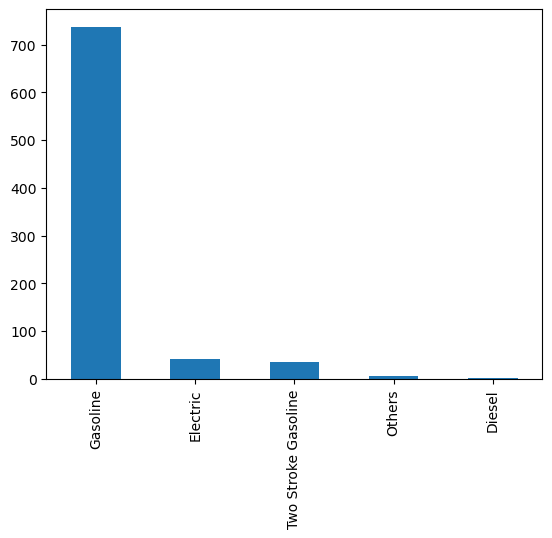

In [23]:
df.fuel[df['mileage']==1].value_counts().plot(kind='bar');

- Let's compare it with a motorcycle that uses the fuel with a mileage that does not match its capacity.

In [24]:
df.fuel[df['mileage']==0].value_counts()

Gasoline    1682
Diesel        90
Electric       2
Others         1
Name: fuel, dtype: int64

- Show visualization of fuel (Column fuel) that does not match the mileage capacity (column mileage)

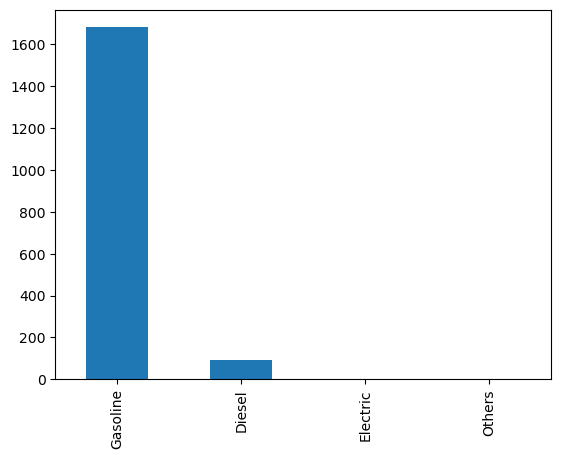

In [25]:
df.fuel[df['mileage']==0].value_counts().plot(kind='bar');

## Pivot

In [26]:
def make_pivot(param1, param2):     
    df_slice = df[[param1, param2, 'mileage']]     
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)     
    p_chart = slice_pivot.plot(kind='bar');     
    for p in p_chart.patches:         
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))     
        return slice_pivot     
        return p_chart

## Pivot between Column power and Column fuel

*To see the number of motors that use a particular column fuel in the power
type group of the column gear motor and to see the distance between the column mileage*

mileage                                                 \
fuel      Diesel Electric Electric/Gasoline Gasoline LPG Others   
power                                                             
1.0            0       50                 0      318   0      6   
3.0            1       58                 2      327   0     10   
4.0            1       43                 1      320   0      3   
5.0            4       22                 1      105   0      2   
7.0            3        4                 0       91   0      1   
...          ...      ...               ...      ...  ..    ...   
12447.0        0        0                 0        3   0      0   
12522.0        0        0                 0        1   0      0   
23331.0        0        0                 0        1   0      0   
34596.0        0        0                 0        3   0      0   
913595.0       0        0                 0        3   0      0   

                              
fuel     Two Stroke Gasoline  
power                         
1.0                       56  
3.0                       66  
4.0                       82  
5.0                       38  
7.0                       20  
...                      ...  
12447.0                    0  
12522.0                    0  
23331.0                    0  
34596.0                    0  
913595.0                   0  

[287 rows x 7 columns]

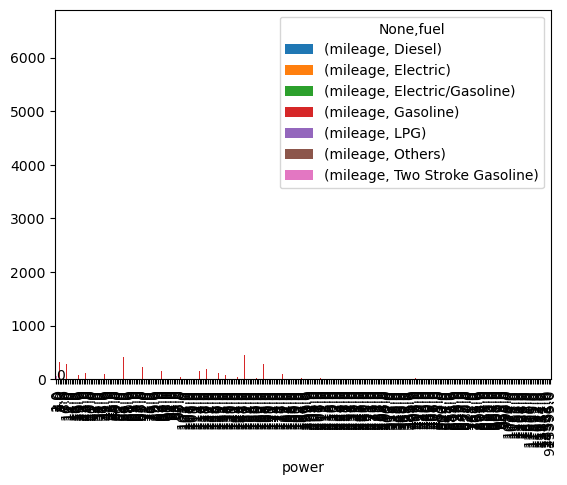

In [27]:
make_pivot('power', 'fuel')

## That's it.

## Thank you